 AI Assistant Usage and Student Behavior Analysis
---------------------------------------------------
This project explores a dataset of student interactions with an AI assistant. The goal is to analyze session behavior, satisfaction levels, and patterns across student levels, disciplines, and outcomes.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv(r"C:\Users\mahen\Data Analytics\ai_assistant_usage_student_life.csv")
df

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9
...,...,...,...,...,...,...,...,...,...,...,...
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3


In [4]:
df.shape

(10000, 11)

OBSERVATION:10000 rows with 11 columns
--------------------------------------

In [5]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [6]:
df.tail()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3
9999,SESSION10000,Undergraduate,Math,2025-04-16,10.85,3,Writing,4,Assignment Completed,True,4.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [8]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [9]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())  

Outliers handled with Winsorization using IQR:
      SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate        Psychology  2025-03-18   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20          11.0  Studying                 2.0   
1             13.09           6.0  Studying                 3.0   
2             19.22           5.0    Coding                 3.0   
3              3.70           1.0    Coding                 3.0   
4             28.12           9.0   Writing                 3.0   

           FinalOutcome  UsedAgain  SatisfactionRating  
0  Assignment Completed       True                 1.0  
1  Assignment Completed       True                 

In [10]:
df.isnull().sum()


SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [12]:
df.duplicated().sum()



0

 data analysis
------------------

-measures+plots

-univariate,bivariate,multivariate


In [13]:
continous=["SessionLengthMin","SatisfactionRating"]
count=["TotalPrompts","AI_AssistanceLevel"]
categorical=["SessionID","StudentLevel","SessionDate","Discipline","TaskType","FinalOutcome","UsedAgain"]

In [14]:
for i in categorical:
    print(df[i].value_counts())

SessionID
SESSION00001    1
SESSION06671    1
SESSION06664    1
SESSION06665    1
SESSION06666    1
               ..
SESSION03334    1
SESSION03335    1
SESSION03336    1
SESSION03337    1
SESSION10000    1
Name: count, Length: 10000, dtype: int64
StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64
SessionDate
2025-04-03    41
2024-08-15    41
2025-01-19    41
2025-04-16    41
2025-06-21    41
              ..
2024-11-12    17
2024-10-11    17
2024-12-30    16
2024-09-24    15
2024-12-28    15
Name: count, Length: 366, dtype: int64
Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64
TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64
FinalOutcome
Assignment Compl

In [15]:
for i in continous:
    print(df[i].describe())

count    10000.000000
mean        19.503103
std         12.795137
min          0.030000
25%          9.630000
50%         16.650000
75%         26.670000
max         52.230000
Name: SessionLengthMin, dtype: float64
count    10000.000000
mean         3.417780
std          1.143331
min          1.000000
25%          2.600000
50%          3.500000
75%          4.400000
max          5.000000
Name: SatisfactionRating, dtype: float64


In [16]:
df[continous].describe().T

,count,mean,std,min,25%,50%,75%,max
SessionLengthMin,10000.0,19.503103,12.795137,0.03,9.63,16.65,26.67,52.23
SatisfactionRating,10000.0,3.417780,1.143331,1.00,2.60,3.50,4.40,5.00


In [17]:
df[count].describe()

,TotalPrompts,AI_AssistanceLevel
count,10000.000000,10000.00000
mean,5.477400,3.49155
std,4.183616,0.96426
min,1.000000,1.50000
25%,2.000000,3.00000
50%,4.000000,4.00000
75%,8.000000,4.00000
max,17.000000,5.00000


In [18]:
df.describe(include='object')

,SessionID,StudentLevel,Discipline,SessionDate,TaskType,FinalOutcome
count,10000,10000,10000,10000,10000,10000
unique,10000,3,7,366,6,4
top,SESSION00001,Undergraduate,Biology,2025-04-03,Writing,Assignment Completed
freq,1,5978,1458,41,3101,4768


In [19]:
df.describe(include='all')

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
count,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000.00000,10000,10000,10000.000000
unique,10000,3,7,366,NaN,NaN,6,NaN,4,2,NaN
top,SESSION00001,Undergraduate,Biology,2025-04-03,NaN,NaN,Writing,NaN,Assignment Completed,True,NaN
freq,1,5978,1458,41,NaN,NaN,3101,NaN,4768,7064,NaN
mean,NaN,NaN,NaN,NaN,19.503103,5.477400,NaN,3.49155,NaN,NaN,3.417780
std,NaN,NaN,NaN,NaN,12.795137,4.183616,NaN,0.96426,NaN,NaN,1.143331
min,NaN,NaN,NaN,NaN,0.030000,1.000000,NaN,1.50000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,9.630000,2.000000,NaN,3.00000,NaN,NaN,2.600000
50%,NaN,NaN,NaN,NaN,16.650000,4.000000,NaN,4.00000,NaN,NaN,3.500000
75%,NaN,NaN,NaN,NaN,26.670000,8.000000,NaN,4.00000,NaN,NaN,4.400000


In [20]:
df[categorical].describe()

,SessionID,StudentLevel,SessionDate,Discipline,TaskType,FinalOutcome,UsedAgain
count,10000,10000,10000,10000,10000,10000,10000
unique,10000,3,366,7,6,4,2
top,SESSION00001,Undergraduate,2025-04-03,Biology,Writing,Assignment Completed,True
freq,1,5978,41,1458,3101,4768,7064


In [21]:
df[continous].cov()

,SessionLengthMin,SatisfactionRating
SessionLengthMin,163.715524,-0.161268
SatisfactionRating,-0.161268,1.307207


In [22]:
df[continous].corr()

,SessionLengthMin,SatisfactionRating
SessionLengthMin,1.000000,-0.011024
SatisfactionRating,-0.011024,1.000000


In [23]:
df[count].cov()

,TotalPrompts,AI_AssistanceLevel
TotalPrompts,17.50264,-0.036920
AI_AssistanceLevel,-0.03692,0.929797


In [24]:
df[count].corr()

,TotalPrompts,AI_AssistanceLevel
TotalPrompts,1.000000,-0.009152
AI_AssistanceLevel,-0.009152,1.000000


In [25]:
df[["SatisfactionRating","TotalPrompts"]].cov()

,SatisfactionRating,TotalPrompts
SatisfactionRating,1.307207,-0.044343
TotalPrompts,-0.044343,17.502640


In [26]:
df[["SatisfactionRating","TotalPrompts"]].corr()

,SatisfactionRating,TotalPrompts
SatisfactionRating,1.00000,-0.00927
TotalPrompts,-0.00927,1.00000


In [27]:
df[["SessionLengthMin","AI_AssistanceLevel"]].cov()


,SessionLengthMin,AI_AssistanceLevel
SessionLengthMin,163.715524,-0.113250
AI_AssistanceLevel,-0.113250,0.929797


In [28]:
df[["SessionLengthMin","AI_AssistanceLevel"]].corr()

,SessionLengthMin,AI_AssistanceLevel
SessionLengthMin,1.000000,-0.009179
AI_AssistanceLevel,-0.009179,1.000000


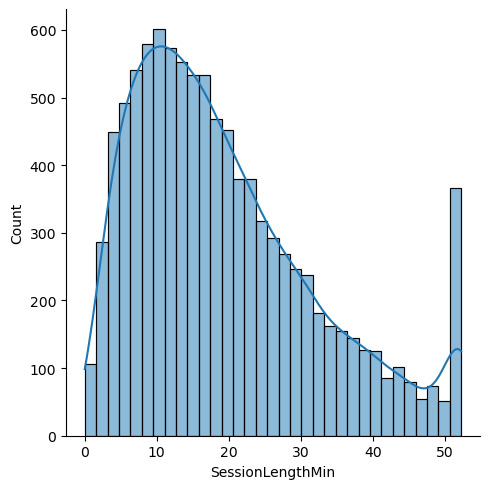

In [29]:
#univariate
sns.displot(df["SessionLengthMin"],kde=True)
plt.show()

observation:
------------
This histogram shows the distribution of session lengths in minutes.  
We observe that most sessions are shorter than 30 minutes, with a long tail of longer sessions.  
This suggests that students typically use the assistant for quick interactions.

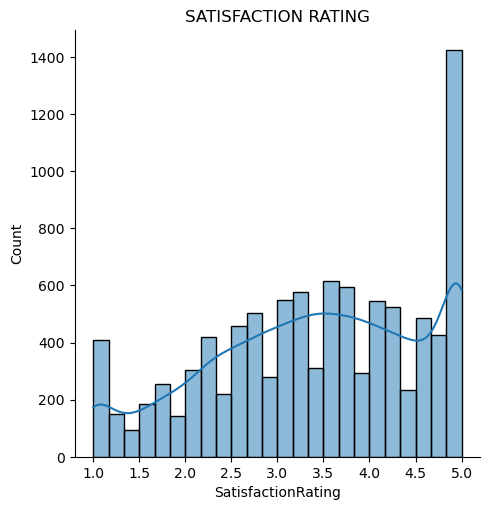

In [30]:
sns.displot(df["SatisfactionRating"],kde=True)
plt.title("SATISFACTION RATING")
plt.show()

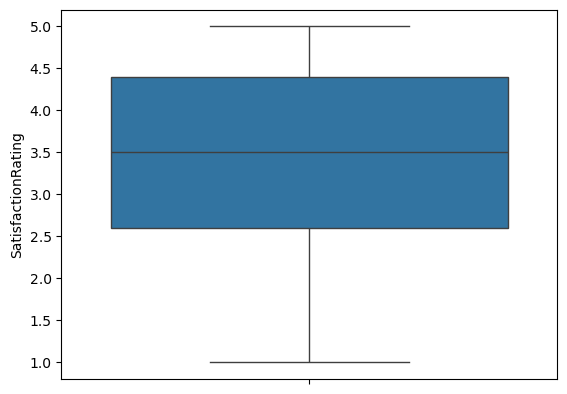

In [31]:
sns.boxplot(y=df["SatisfactionRating"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

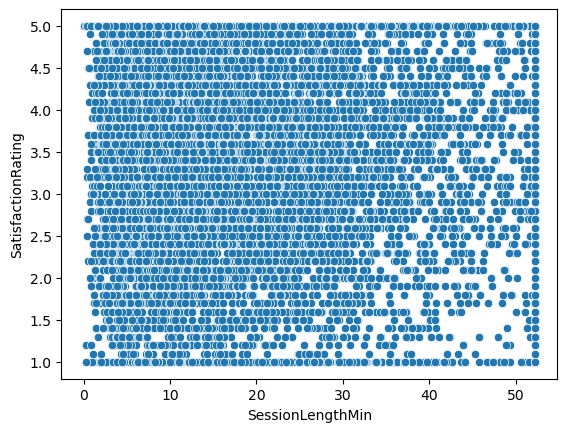

In [32]:
# bivariaten
sns.scatterplot(x=df["SessionLengthMin"],y=df["SatisfactionRating"])
plt.show

observation:
------------
The scatter plot reveals a positive trend — as session length increases, satisfaction ratings also tend to be higher.  
This may indicate that longer sessions provide more value or engagement for students.


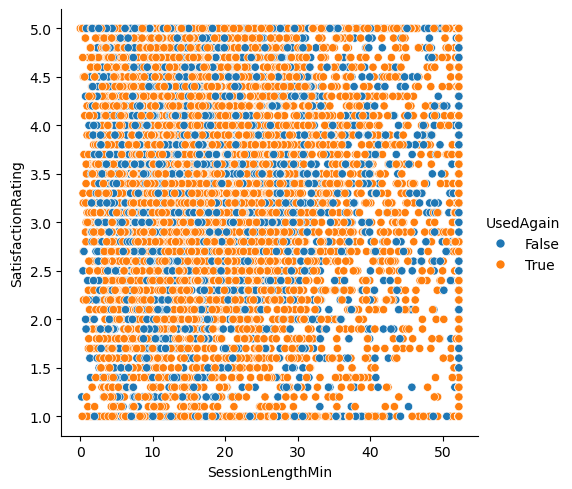

In [33]:
sns.relplot(x=df["SessionLengthMin"],y=df["SatisfactionRating"],data=df,hue="UsedAgain")
plt.show()

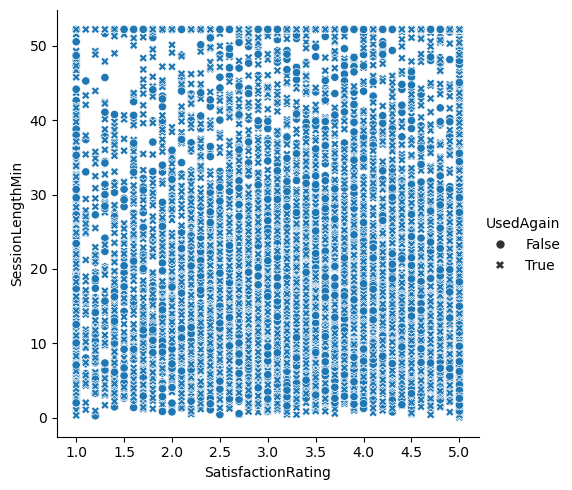

In [34]:
sns.relplot(x=df["SatisfactionRating"],y=df["SessionLengthMin"],data=df,style="UsedAgain")
plt.show()

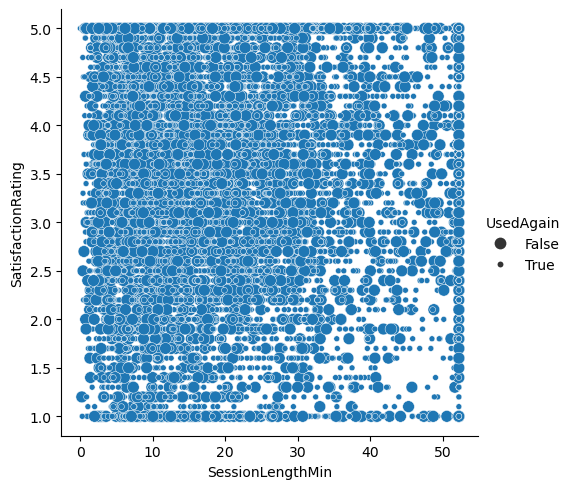

In [35]:
sns.relplot(x=df["SessionLengthMin"],y=df["SatisfactionRating"],data=df,size="UsedAgain")
plt.show()

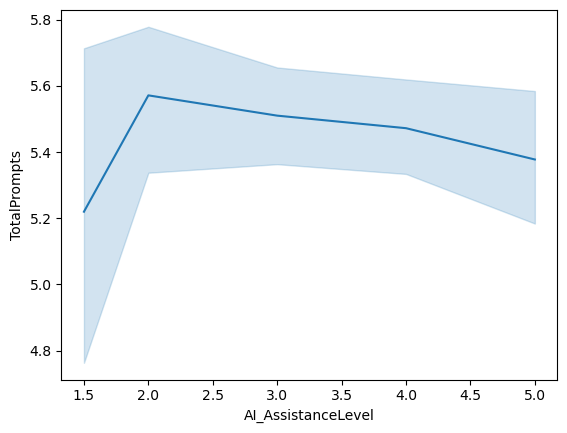

In [36]:
sns.lineplot(x="AI_AssistanceLevel",y="TotalPrompts",data=df)
plt.show()

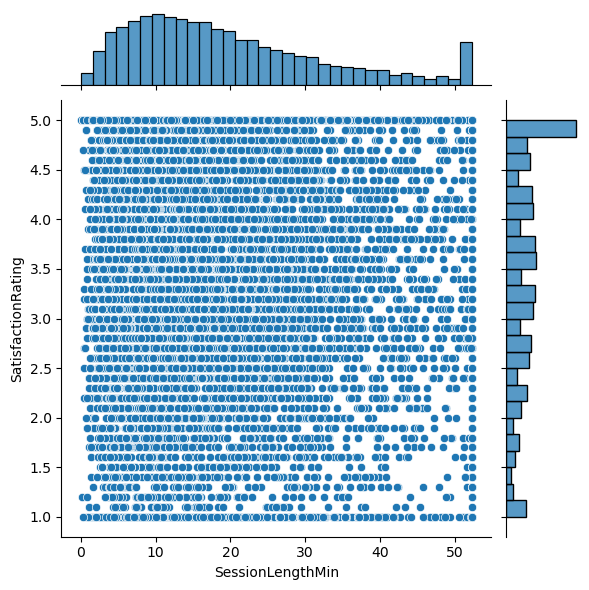

In [37]:
sns.jointplot(x="SessionLengthMin",y="SatisfactionRating",data=df)
plt.show()

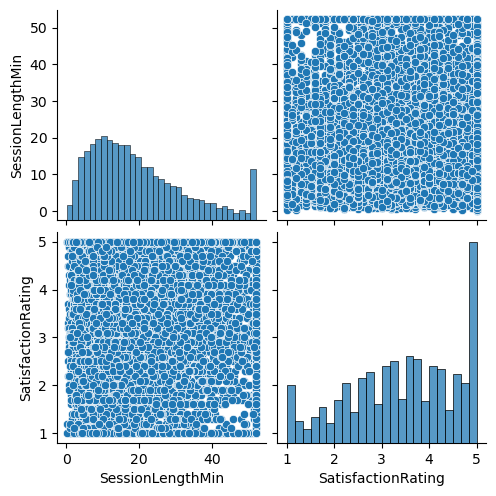

In [38]:
sns.pairplot(df,vars=continous)
plt.show()

In [39]:
a=df[["SatisfactionRating","TotalPrompts"]].corr()
a

,SatisfactionRating,TotalPrompts
SatisfactionRating,1.00000,-0.00927
TotalPrompts,-0.00927,1.00000


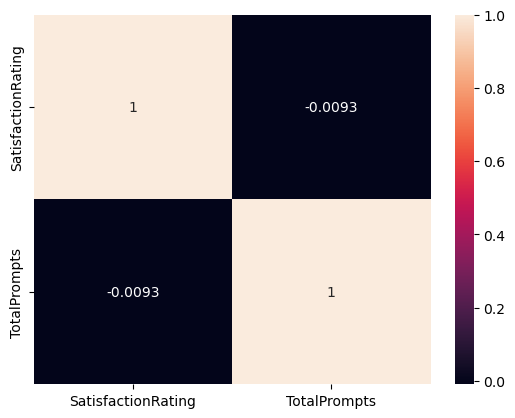

In [40]:
sns.heatmap(a,annot=True)
plt.show()

plots for discrete data
------------------------

In [41]:
df.columns

Index(['SessionID', 'StudentLevel', 'Discipline', 'SessionDate',
       'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'SatisfactionRating'],
      dtype='object')

In [42]:
continous=["SessionLengthMin","SatisfactionRating"]
count=["TotalPrompts","AI_AssistanceLevel"]
categorical=["SessionID","StudentLevel","SessionDate","Discipline","TaskType","FinalOutcome","UsedAgain"]

In [43]:
df["FinalOutcome"].unique()

array(['Assignment Completed', 'Idea Drafted', 'Confused', 'Gave Up'],
      dtype=object)

In [44]:
df["FinalOutcome"].nunique()

4

In [45]:
df["StudentLevel"].value_counts()

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64

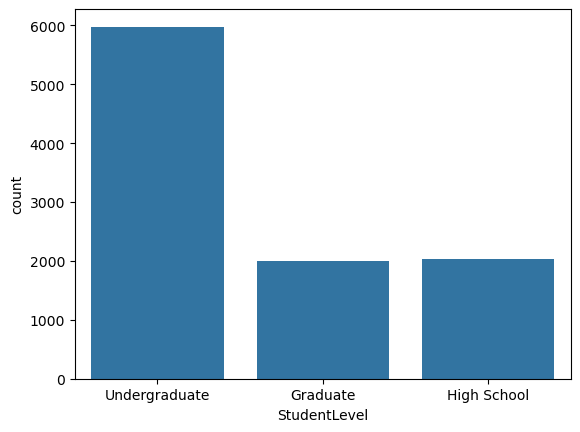

In [94]:
sns.countplot(x=df["StudentLevel"])


plt.show()



              

observation:
------------ 
The bar chart shows that undergraduate students have the highest number of sessions, followed by master's students.  
PhD students have the fewest sessions.  
This could reflect differences in how each level uses AI tools in their studies.


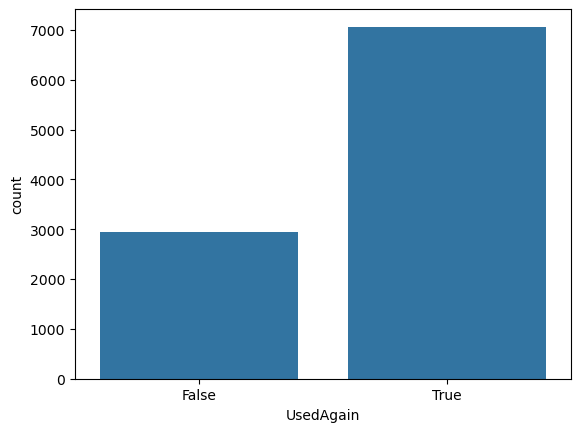

In [47]:
sns.countplot(x=df["UsedAgain"])
plt.show()

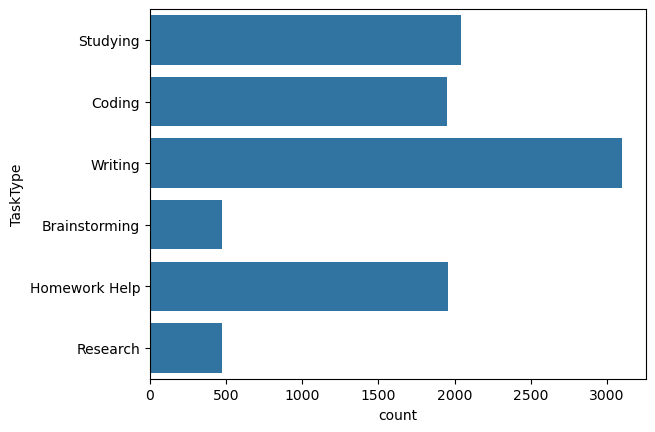

In [48]:
sns.countplot(y=df["TaskType"],data=df)
plt.show()

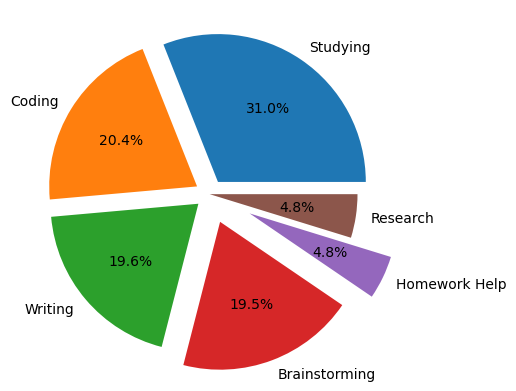

In [86]:
plt.pie(x=df["TaskType"].value_counts(),labels=df["TaskType"].unique(),autopct="%0.1f%%",explode=(0.1,0.1,0.1,0.2,0.3,0))
plt.show()

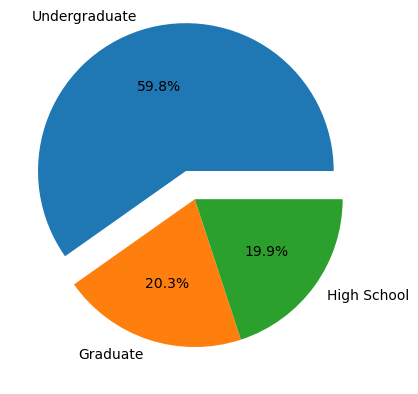

In [95]:
plt.pie(x=df["StudentLevel"].value_counts(),labels=df["StudentLevel"].unique(),autopct="%0.1f%%",explode=(0.2,0,0))
plt.show()

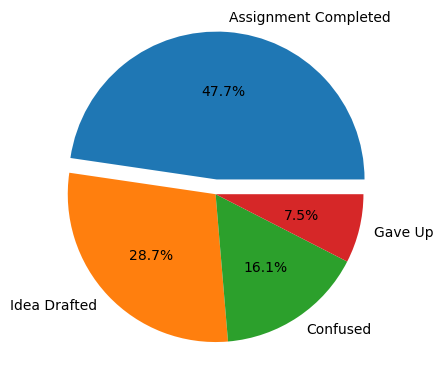

In [96]:
plt.pie(x=df["FinalOutcome"].value_counts(),labels=df["FinalOutcome"].unique(),autopct="%0.1f%%",explode=(0.1,0,0,0))
plt.show()

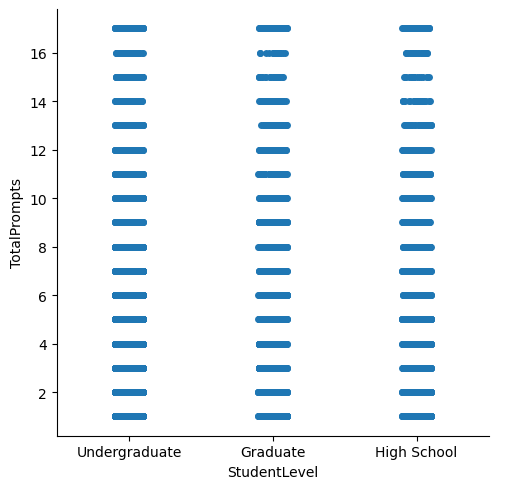

In [52]:
sns.catplot(x="StudentLevel",y="TotalPrompts",data=df)
plt.show()

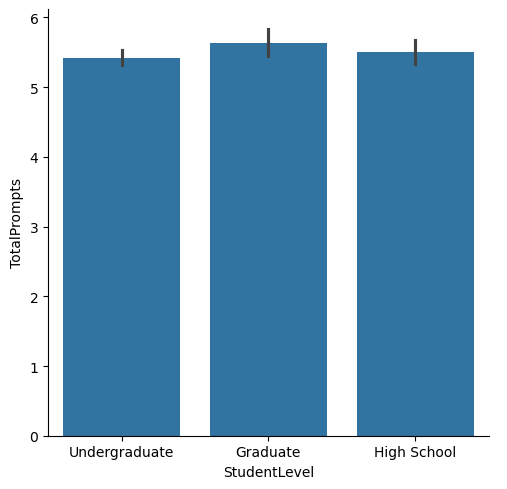

In [53]:
sns.catplot(x="StudentLevel",y="TotalPrompts",data=df,kind="bar")
plt.show()

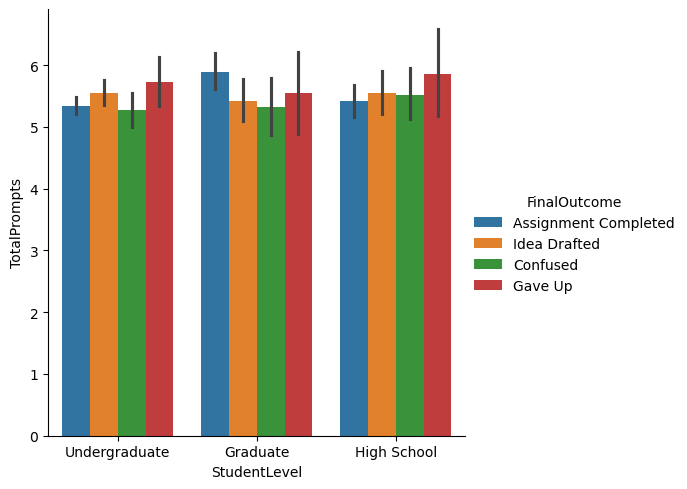

In [54]:
sns.catplot(x="StudentLevel",y="TotalPrompts",data=df,kind="bar",hue="FinalOutcome")
plt.show()

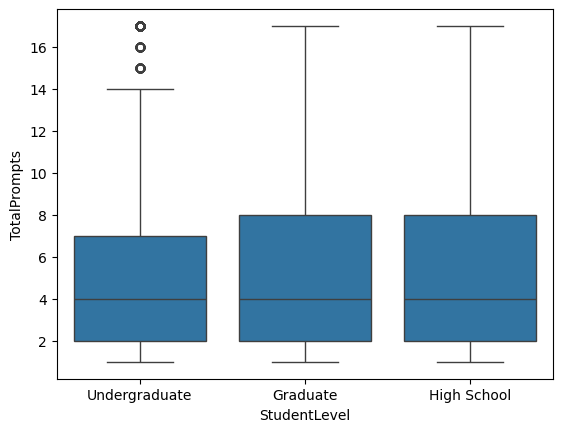

In [55]:
sns.boxplot(x="StudentLevel",y="TotalPrompts",data=df)
plt.show()

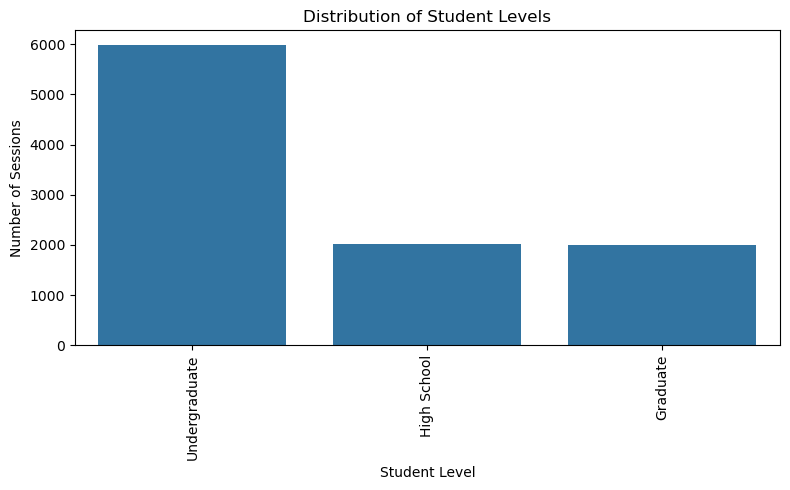

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='StudentLevel', order=df['StudentLevel'].value_counts().index)
plt.title('Distribution of Student Levels')
plt.xlabel('Student Level')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\mahen\AppData\Local\Temp\ipykernel_15080\2389839175.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


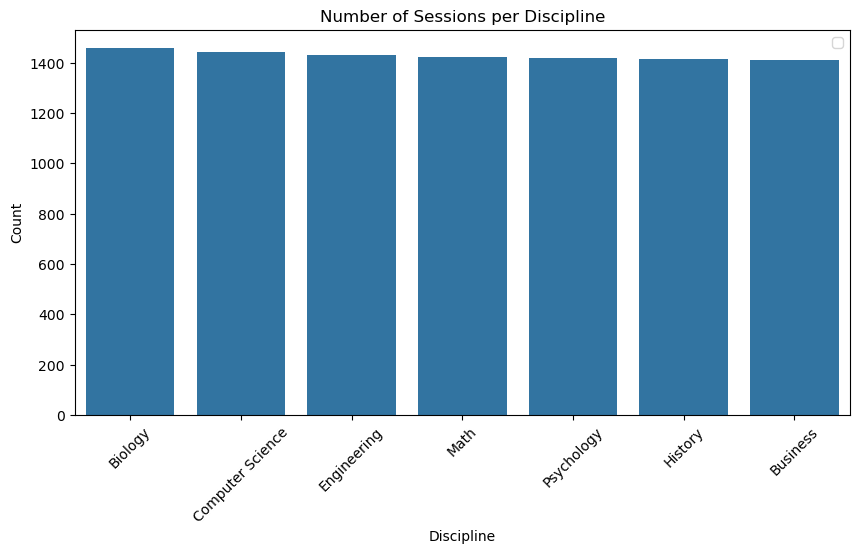

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Discipline', order=df['Discipline'].value_counts().index)
plt.title('Number of Sessions per Discipline')
plt.xlabel('Discipline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

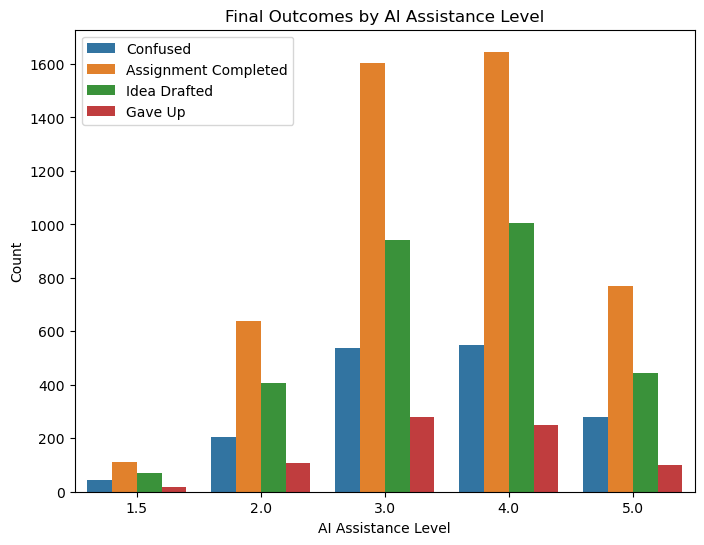

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AI_AssistanceLevel', hue='FinalOutcome')
plt.title('Final Outcomes by AI Assistance Level')
plt.xlabel('AI Assistance Level')
plt.ylabel('Count')
plt.legend()
plt.show()


C:\Users\mahen\AppData\Local\Temp\ipykernel_15080\2467863094.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


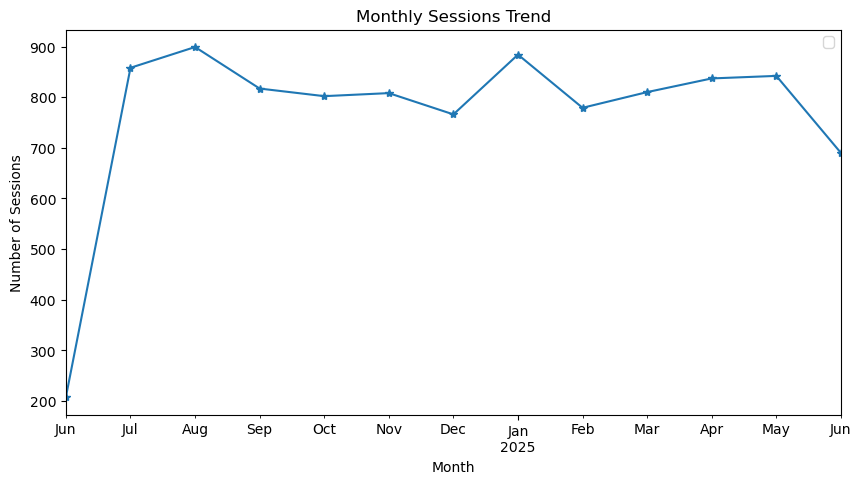

In [59]:
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
sessions_over_time = df.groupby(df['SessionDate'].dt.to_period('M')).size()
sessions_over_time.plot(kind='line', marker='*', figsize=(10, 5), title='Monthly Sessions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sessions')
plt.legend()
plt.show()

1.How many rows and columns does the dataset contain?
-----------------------------------------------------



In [60]:
df.shape

(10000, 11)

observation: 10000 rows with 11 columns
---------------------------------------

2.What types of variables are present (categorical, continuous, count)?
----------------------------------------------------------------------


In [61]:
continous=["SessionLengthMin","SatisfactionRating"]
count=["TotalPrompts","AI_AssistanceLevel"]
categorical=["SessionID","StudentLevel","SessionDate","Discipline","TaskType","FinalOutcome","UsedAgain"]


3.Are there any missing or duplicated records in the dataset?
-------------------------------------------------------------

In [62]:
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [63]:
df.duplicated().sum()

0

observation: no missing values & no duplicates
------------------------------------------------

4.What is the distribution of session lengths (SessionLengthMin)?
------------------------------------------------------------------

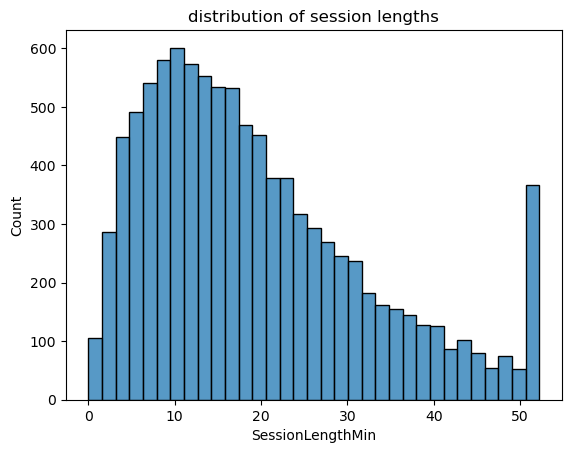

In [64]:
sns.histplot(df["SessionLengthMin"])

plt.title("distribution of session lengths")
plt.show()

5.What is the distribution of satisfaction ratings (SatisfactionRating)?
------------------------------------------------------------------------



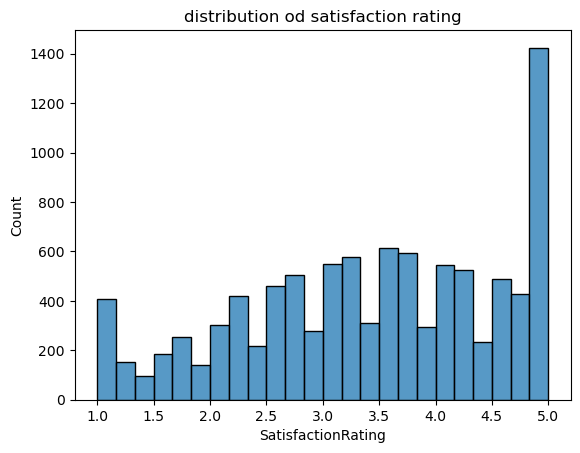

In [65]:
sns.histplot(df["SatisfactionRating"])
plt.title("distribution od satisfaction rating")
plt.show()

6.Which Discipline has the most students?
-----------------------------------------



In [66]:
df["Discipline"].unique()

array(['Computer Science', 'Psychology', 'Business', 'Biology', 'Math',
       'History', 'Engineering'], dtype=object)

In [67]:
df["Discipline"].value_counts()

Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64

observation: discipline has the most students in biology
--------------------------------------------------------

In [68]:
df["Discipline"].nunique()

7

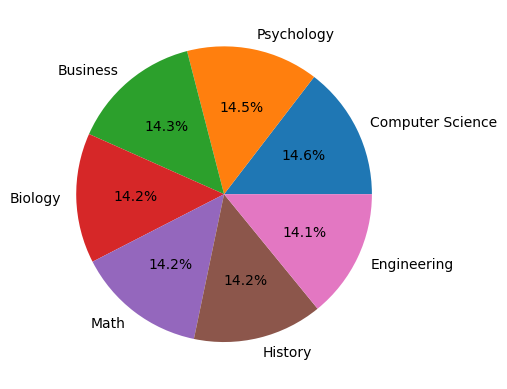

In [69]:
plt.pie(x=df["Discipline"].value_counts(),labels=df["Discipline"].unique(),autopct="%0.1f%%",explode=(0,0,0,0,0,0,0))
plt.show()

7.How many sessions were repeated (UsedAgain) and how many were not?
--------------------------------------------------------------------

In [70]:
df["UsedAgain"].unique()

array([ True, False])

In [71]:
df["UsedAgain"].nunique()

2

In [72]:
df["UsedAgain"].value_counts()

UsedAgain
True     7064
False    2936
Name: count, dtype: int64

observation:  mostly  repeated session  are used
--------------------------------------------------

8.Is there a relationship between session length and satisfaction rating?
----------------------------------------------------------------------------

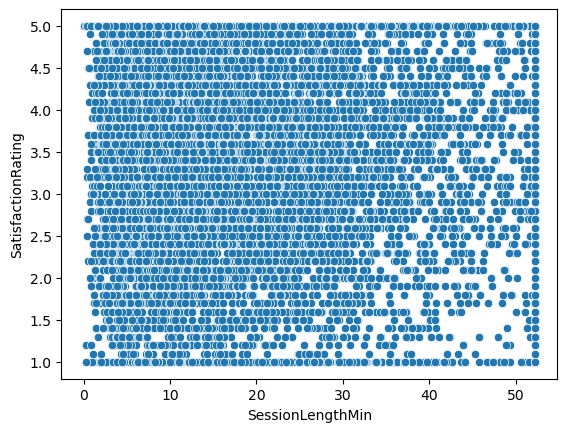

In [73]:
sns.scatterplot(x=df["SessionLengthMin"],y=df['SatisfactionRating'],data=df)
plt.show()

9.What is the correlation between SatisfactionRating and TotalPrompts?
----------------------------------------------------------------------



In [74]:
a=df[["SatisfactionRating","TotalPrompts"]].corr()
a

,SatisfactionRating,TotalPrompts
SatisfactionRating,1.00000,-0.00927
TotalPrompts,-0.00927,1.00000


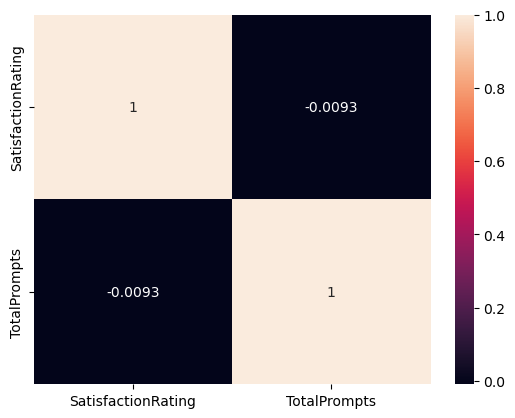

In [75]:
sns.heatmap(a,annot=True)
plt.show()

10.How does AI_AssistanceLevel affect the number of prompts used?
------------------------------------------------------------------

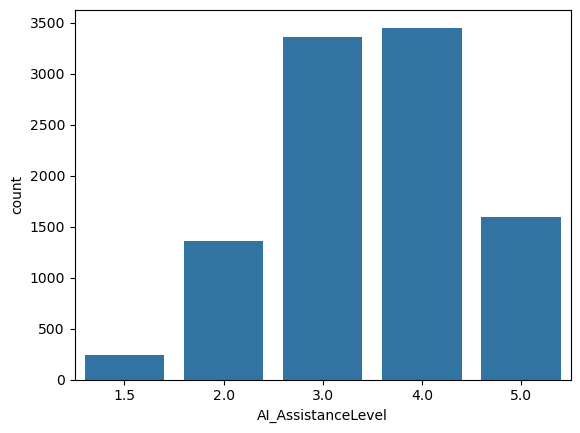

In [76]:
sns.countplot(x=df["AI_AssistanceLevel"])
plt.show()

11.Are there any strong correlations among the continuous variables (SessionLengthMin, SatisfactionRating)?
---------------------------------------------------------------------------------------------------------------------

In [77]:
a=df[continous].corr()
a

,SessionLengthMin,SatisfactionRating
SessionLengthMin,1.000000,-0.011024
SatisfactionRating,-0.011024,1.000000


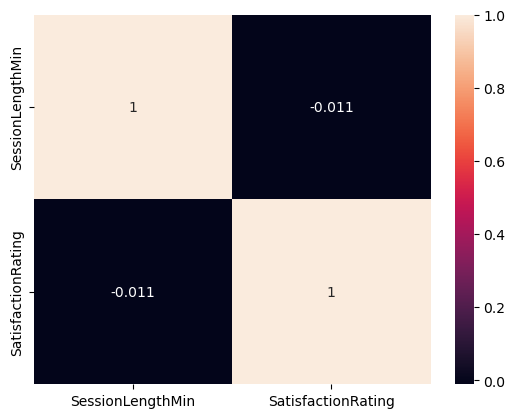

In [78]:
sns.heatmap(a,annot=True)
plt.show()

12.What patterns emerge when visualizing satisfaction rating by session length and usage repeat (UsedAgain)?
------------------------------------------------------------------------------------------

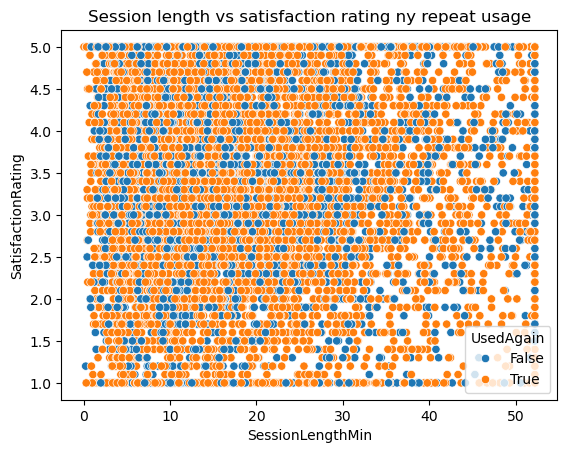

In [79]:
sns.scatterplot(x="SessionLengthMin",y="SatisfactionRating",data=df,hue="UsedAgain")
plt.title("Session length vs satisfaction rating ny repeat usage")
plt.show()

13.Do students of different levels (StudentLevel) report different satisfaction ratings?
-------------------------------------------------------------------------------------------

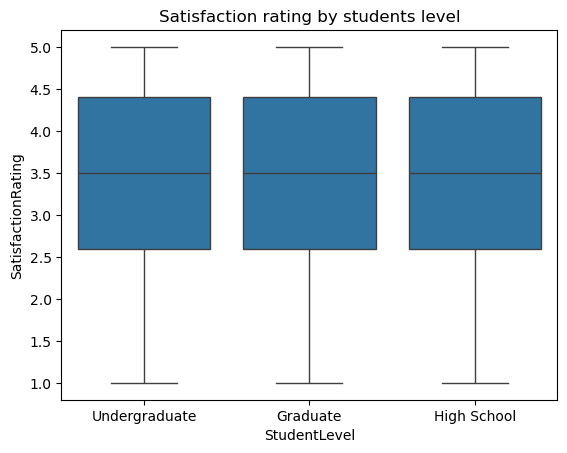

In [80]:
sns.boxplot(x="StudentLevel",y="SatisfactionRating",data=df)
plt.title("Satisfaction rating by students level")
plt.show()

14.How does the FinalOutcome relate to satisfaction and session duration?
------------------------------------------------------------------------

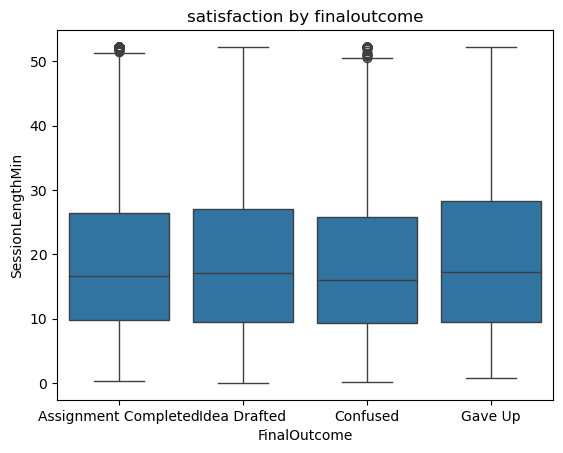

In [81]:
sns.boxplot(x="FinalOutcome",y="SessionLengthMin",data=df)
plt.title("satisfaction by finaloutcome")
plt.show()